# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [2]:
df = pd.read_csv("./data/stroke_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Drop Columns

In [3]:
df.drop(['id'], axis = 1, inplace = True)

C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_15704\1888440593.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_15704\1888440593.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_15704\1888440593.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))


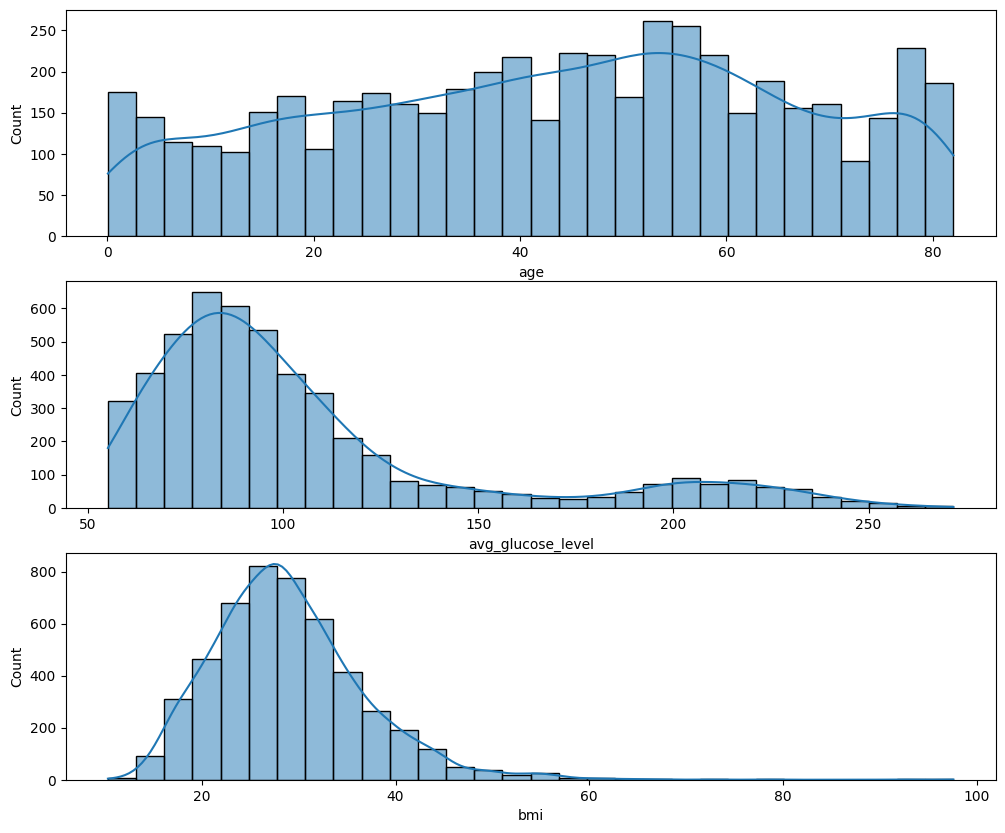

In [4]:
plt.figure(figsize=(12,10))
for i,col in enumerate(df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

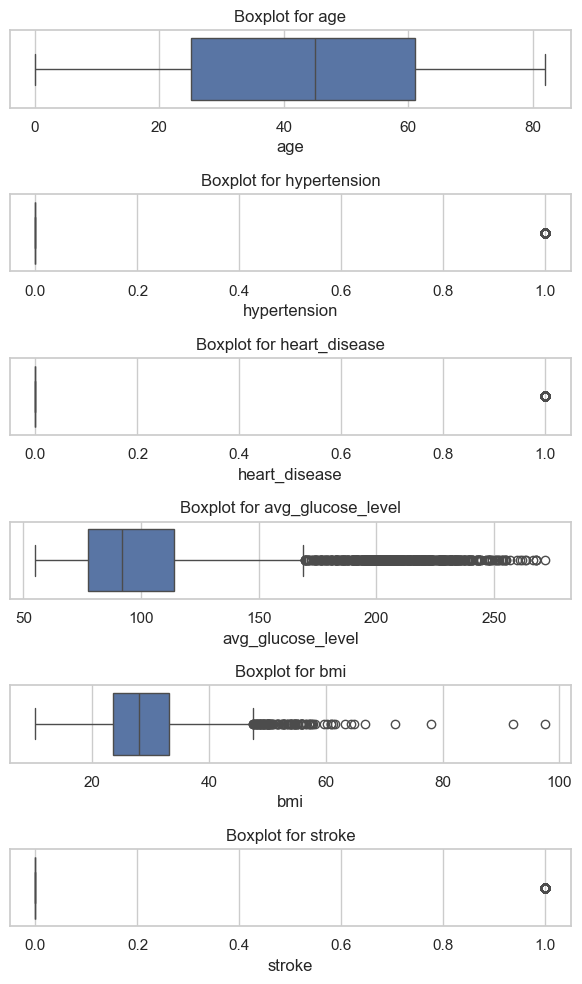

In [5]:
num_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6, 10))
sns.set(style="whitegrid")

for i, column in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

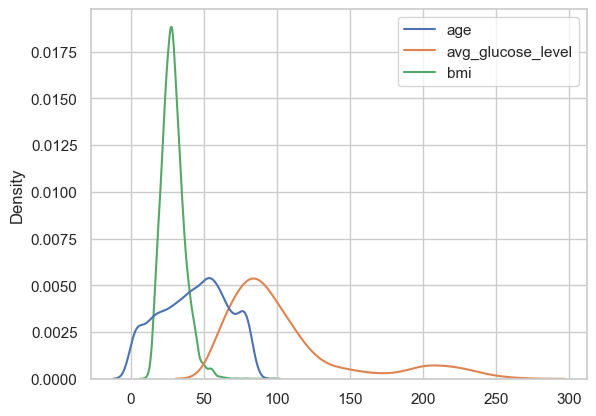

In [6]:
numerical_data = df[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

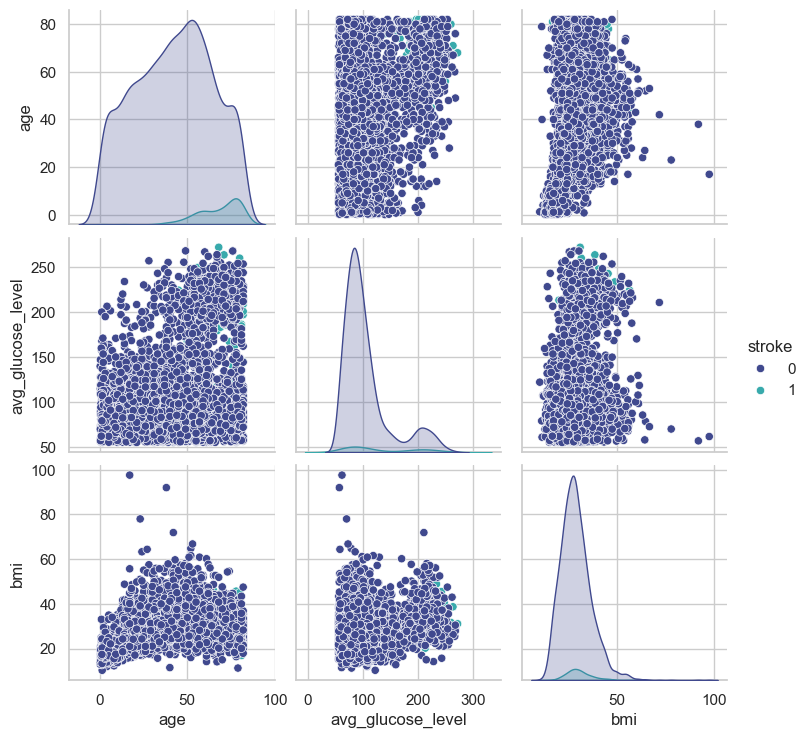

In [7]:
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette='mako')
plt.show()

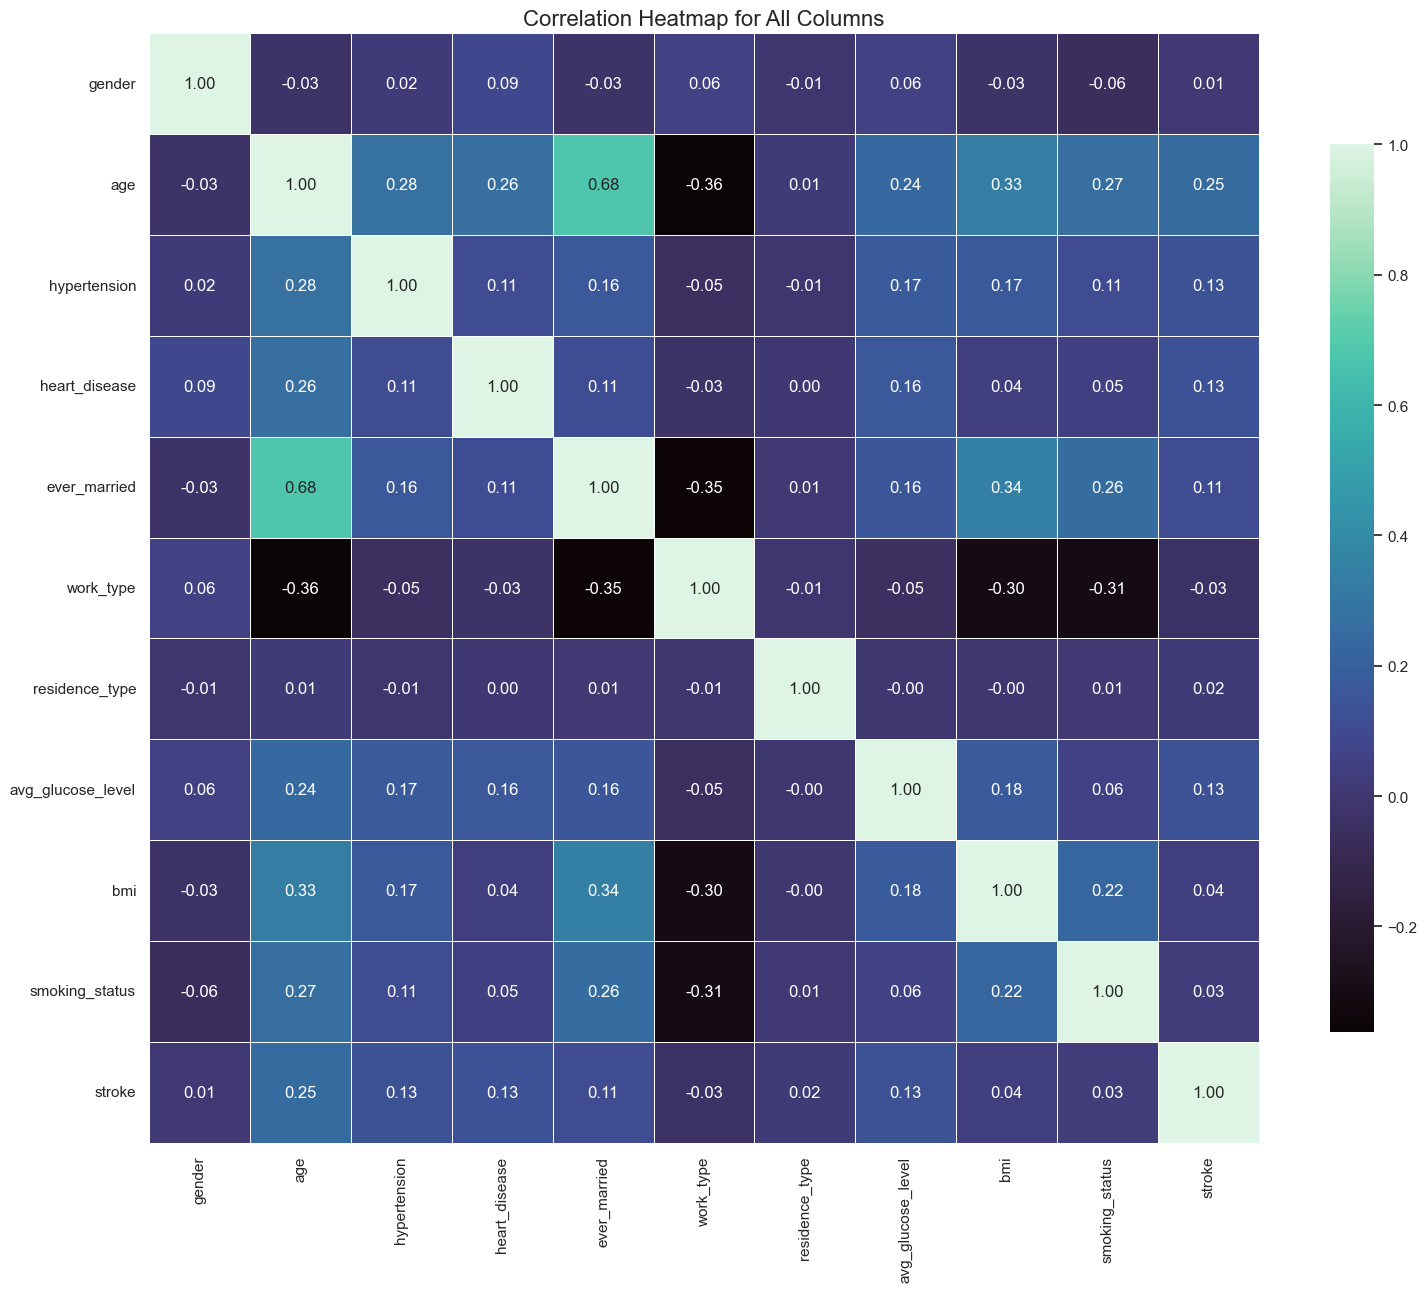

In [8]:
corr_data = df.copy()
encoder = LabelEncoder()

for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] = encoder.fit_transform(corr_data[col])

plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(), annot=True, cmap='mako', fmt=".2f", linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, square=True)

plt.title('Correlation Heatmap for All Columns', fontsize=16)
plt.tight_layout()
plt.show()

KeyError: 'Residence_type'

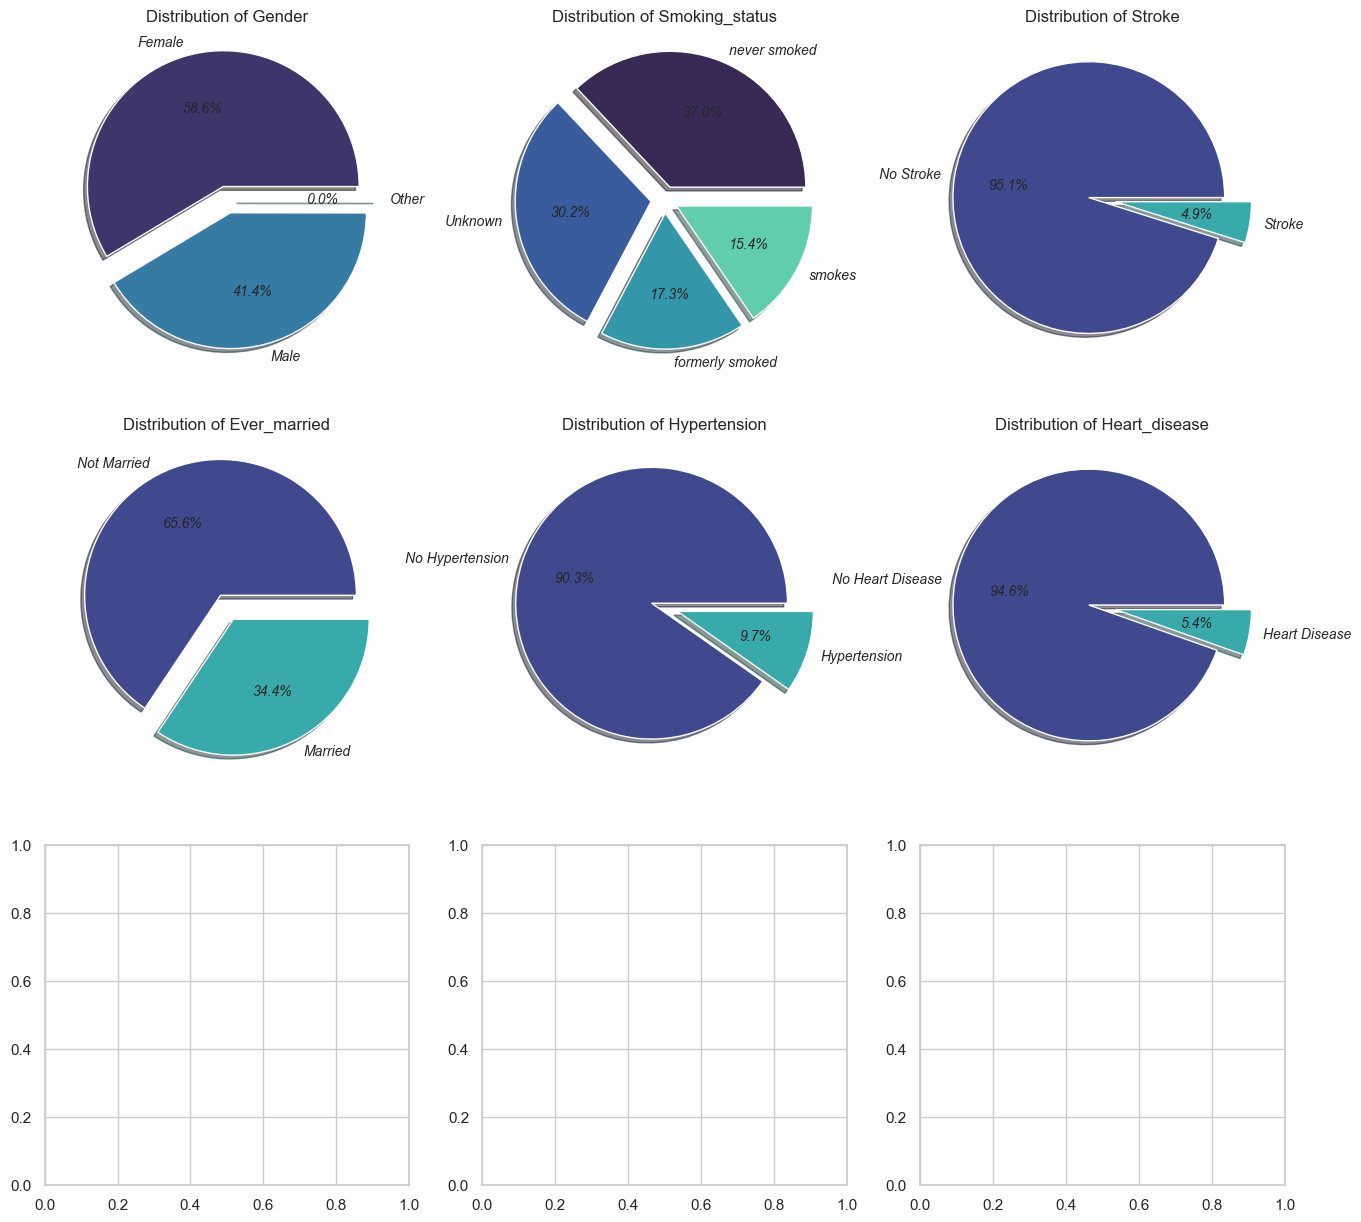

In [9]:
columns = {
    'gender': None,  
    'smoking_status': None,
    'stroke': ['No Stroke', 'Stroke'],
    'ever_married': ['Not Married', 'Married'],
    'hypertension': ['No Hypertension', 'Hypertension'],
    'heart_disease': ['No Heart Disease', 'Heart Disease'],
    'Residence_type': None
}

n_cols = 3 
n_rows = (len(columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

for i, (col, labels) in enumerate(columns.items()):
    values = df[col].value_counts()
    if labels:
        pie_labels = labels
    else:
        pie_labels = values.index
    axes[i].pie(values, 
                labels=pie_labels, 
                autopct='%1.1f%%',
                colors=sns.color_palette('mako', len(values)),
                explode=[0.1] * len(values), 
                shadow=True,
                textprops={'fontsize': 10, 'style': 'italic'})

    axes[i].set_title(f"Distribution of {col.capitalize()}", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

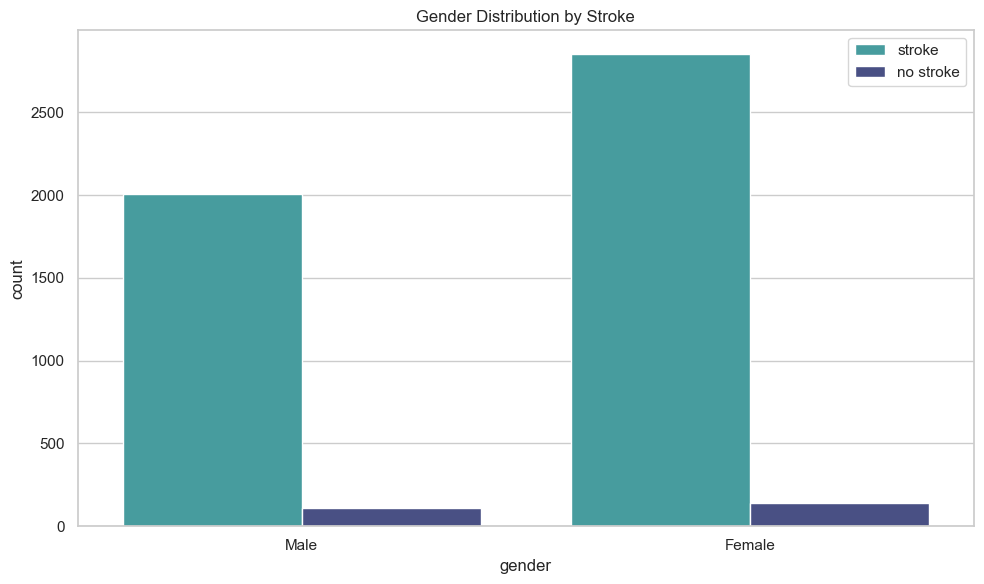

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, palette='mako_r', hue='stroke')  
plt.legend(['stroke', 'no stroke']) 
plt.title('Gender Distribution by Stroke')
plt.tight_layout()
plt.show()

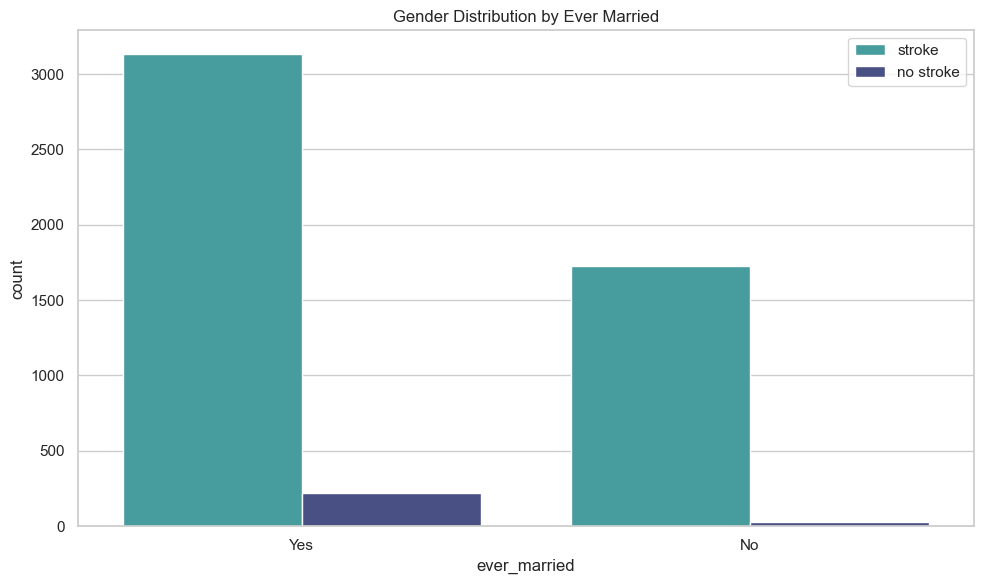

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=df, palette='mako_r', hue='stroke')  
plt.legend(['stroke', 'no stroke']) 
plt.title('Gender Distribution by Ever Married')
plt.tight_layout()
plt.show()

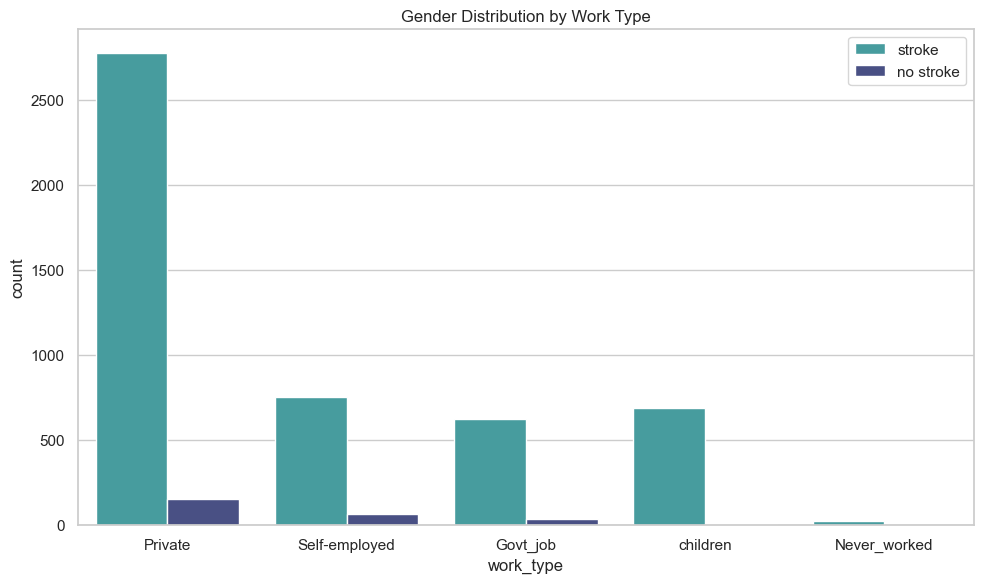

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette='mako_r', hue='stroke')  
plt.legend(['stroke', 'no stroke']) 
plt.title('Gender Distribution by Work Type')
plt.tight_layout()
plt.show()

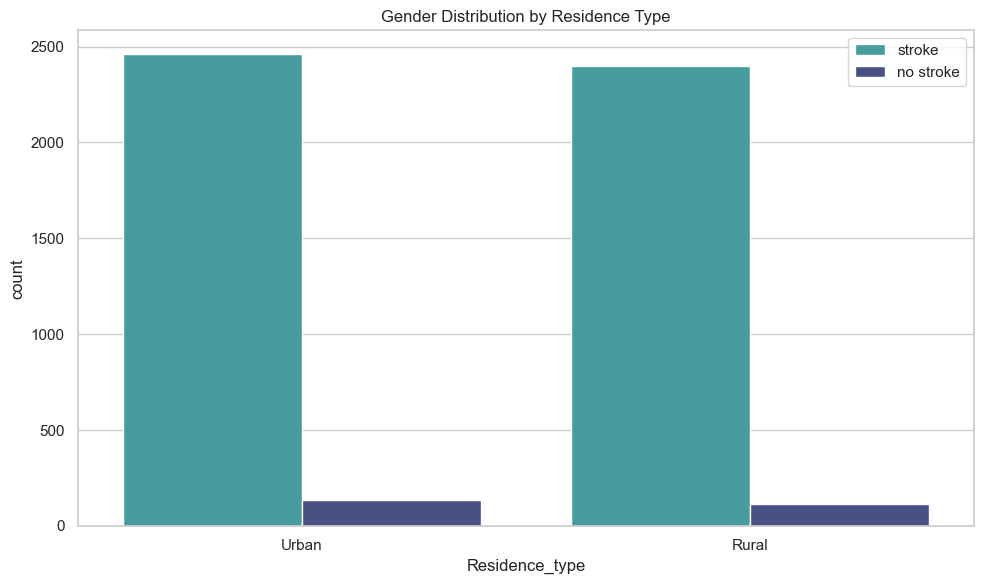

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette='mako_r', hue='stroke')  
plt.legend(['stroke', 'no stroke']) 
plt.title('Gender Distribution by Residence Type')
plt.tight_layout()
plt.show()

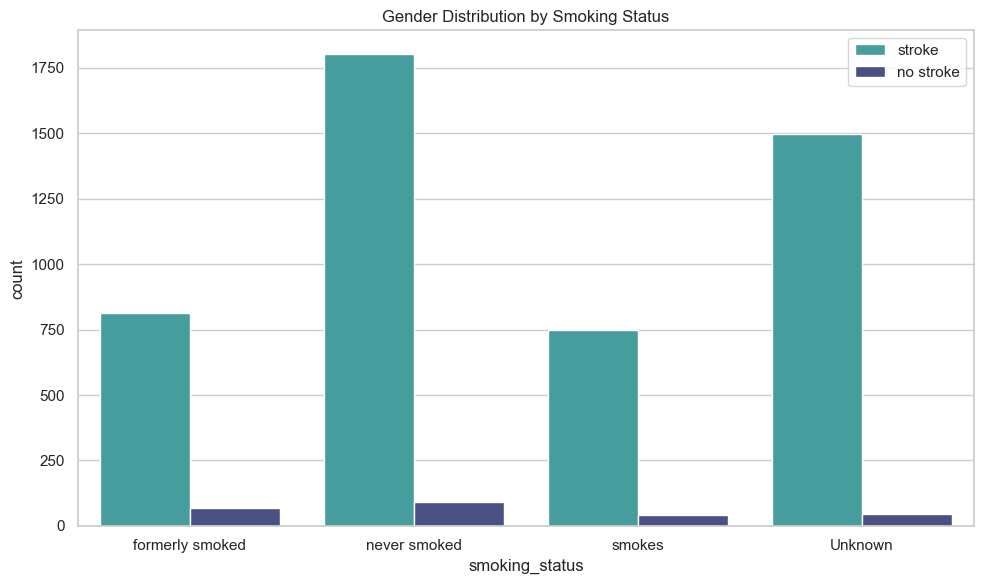

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='mako_r', hue='stroke')  
plt.legend(['stroke', 'no stroke']) 
plt.title('Gender Distribution by Smoking Status')
plt.tight_layout()
plt.show()